In [901]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [947]:
# Suppress warnings about processing individual user vectors as opposed to a collection of users in a dataframe
import warnings
warnings.filterwarnings(action='ignore')

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Import Data #

In [330]:
# Import data from file
df_o = pd.read_csv("../Datasets/moocs23-24.csv")
df_o

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,4,HarvardX,PH207x,2023,Fall,MHxPC130313697,0,0,0,India,...,0.0,7/24/2023,7/27/2024,6,3,197757,0,0,0,23
1,6,HarvardX,PH207x,2023,Fall,MHxPC130237753,1,0,0,United States,...,0.0,7/24/2023,12/24/2023,107,8,7,2,0,0,19
2,7,HarvardX,CS50x,2023,Summer,MHxPC130202970,1,0,0,United States,...,0.0,7/24/2023,3/28/2024,8,1,197757,1,0,0,24
3,20,HarvardX,CS50x,2023,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,0.0,7/24/2023,7/15/2024,25,2,197757,4,0,0,20
4,22,HarvardX,PH207x,2023,Fall,MHxPC130317399,0,0,0,Australia,...,0.0,7/24/2023,8/25/2023,3,2,197757,0,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416916,583001,MITx,6.002x,2024,Spring,MHxPC130030805,1,0,0,Pakistan,...,0.0,9/7/2024,9/7/2024,29,1,197757,1,0,0,24
416917,583002,MITx,6.00x,2024,Spring,MHxPC130184108,1,0,0,Canada,...,0.0,9/7/2024,9/7/2024,97,1,4,2,0,0,22
416918,583003,MITx,6.00x,2024,Spring,MHxPC130359782,0,0,0,Other Europe,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,22
416919,583004,MITx,6.002x,2024,Spring,MHxPC130098513,0,0,0,United States,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,34


In [331]:
# df_o.columns

In [332]:
# Create copy of the dataframe to preserve integrity
df = df_o.copy()

# Data Cleaning #

### *Check columns for N/A values* ###

In [333]:
df.isna().sum()

Id                       0
institute                0
course_id                0
year                     0
semester                 0
userid_DI                0
viewed                   0
explored                 0
certified                0
final_cc_cname_DI        0
LoE_DI                   0
gender               23211
grade                    0
start_time_DI            0
last_event_DI            0
nevents                  0
ndays_act                0
nplay_video              0
nchapters                0
nforum_posts             0
incomplete_flag          0
age                      0
dtype: int64

In [1429]:
# print("Percentage of entries that lack gender information: ",format(23211/len(df_o)*100, ".2f"), "%")

Percentage of entries that lack gender information:  5.57 %

Because gender is one key feature of this dataset and because it is the only aspect of the dataset that appears to be missing, it makes sense to remove the rows with missing values in order to reduce the amount of "noise" in the data itself.

In [335]:
# Isolate indices of rows with blank values and drop rows
df = df.drop(df[df["gender"].isna()].index)

In [336]:
# Reset index after dropping rows
df = df.reset_index(drop=True)

In [337]:
df

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,4,HarvardX,PH207x,2023,Fall,MHxPC130313697,0,0,0,India,...,0.0,7/24/2023,7/27/2024,6,3,197757,0,0,0,23
1,6,HarvardX,PH207x,2023,Fall,MHxPC130237753,1,0,0,United States,...,0.0,7/24/2023,12/24/2023,107,8,7,2,0,0,19
2,7,HarvardX,CS50x,2023,Summer,MHxPC130202970,1,0,0,United States,...,0.0,7/24/2023,3/28/2024,8,1,197757,1,0,0,24
3,20,HarvardX,CS50x,2023,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,0.0,7/24/2023,7/15/2024,25,2,197757,4,0,0,20
4,22,HarvardX,PH207x,2023,Fall,MHxPC130317399,0,0,0,Australia,...,0.0,7/24/2023,8/25/2023,3,2,197757,0,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393705,583001,MITx,6.002x,2024,Spring,MHxPC130030805,1,0,0,Pakistan,...,0.0,9/7/2024,9/7/2024,29,1,197757,1,0,0,24
393706,583002,MITx,6.00x,2024,Spring,MHxPC130184108,1,0,0,Canada,...,0.0,9/7/2024,9/7/2024,97,1,4,2,0,0,22
393707,583003,MITx,6.00x,2024,Spring,MHxPC130359782,0,0,0,Other Europe,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,22
393708,583004,MITx,6.002x,2024,Spring,MHxPC130098513,0,0,0,United States,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,34


In [338]:
# Remove columns that are not needed for analysis
df = df.drop(["Id","year", "semester", "start_time_DI", "last_event_DI","viewed","grade","start_time_DI","explored","last_event_DI","nevents","ndays_act","nplay_video", "nchapters", "nforum_posts","incomplete_flag"], axis=1)

### *Correct User Anomalies* ###
In some cases users across institutes have the same number but different user features, which leads me to believe that I ought to separate the user ID among institutes.

In [339]:
# Set character to denote institute ('M' or 'H')
df["institute_char"] = df["institute"].apply(lambda x: "H" if x=="HarvardX" else "M")

In [340]:
# Set character to denote institute ('m' or 'h')
# df["institute_char"] = ['H' if institute=="HarvardX" else 'M' for institute in  df["institute"]]

In [341]:
# Zip while removing preceeding character for legibility
userids = [str(item[1]+item[0][5:]) for item in list(zip(df["userid_DI"], df["institute_char"]))] 
df["userid_DI"]= userids

In [342]:
df.drop(["institute_char"], axis=1, inplace=True)

In [343]:
df

,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,gender,age
0,HarvardX,PH207x,H130313697,0,India,Bachelor's,m,23
1,HarvardX,PH207x,H130237753,0,United States,Secondary,m,19
2,HarvardX,CS50x,H130202970,0,United States,Bachelor's,m,24
3,HarvardX,CS50x,H130223941,0,Other Middle East/Central Asia,Secondary,m,20
4,HarvardX,PH207x,H130317399,0,Australia,Master's,f,32
...,...,...,...,...,...,...,...,...
393705,MITx,6.002x,M130030805,0,Pakistan,Master's,m,24
393706,MITx,6.00x,M130184108,0,Canada,Bachelor's,m,22
393707,MITx,6.00x,M130359782,0,Other Europe,Bachelor's,f,22
393708,MITx,6.002x,M130098513,0,United States,Doctorate,m,34


# Feature Engineering #

### *Transform categorical information to one-hot encoding* ###
#### *Gender* ####

In [344]:
# Transform gender information to binary representation
# https://www.geeksforgeeks.org/python/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/
df["gender_numerical"] = df["gender"].apply(lambda x: 1 if x=='m' else 0)

In [345]:
# Drop original gender column
df = df.drop(["gender"], axis=1)

# Check results
# df.head()

#### *Age* ####

In [346]:
# Create a set of 4 age brackets (indicators) and assign category to age bracket
# https://www.geeksforgeeks.org/python/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/
df["age_indicator"] = df["age"].apply(lambda x: 0 if x<=17 else (
                                                        1 if x>17 and x<=35 else (
                                                        2 if x>35 and x<60 else 4)))

In [347]:
# Produce age dummy enoding based on indicator information
age_dummies = pd.get_dummies(df["age_indicator"], prefix="age_indicator")

# Check output
# age_dummies

In [348]:
# Concatenate dummies to original df
df = pd.concat([df, age_dummies], axis=1)

# Check result
# df.head()

#### *Level of Education* ####

In [349]:
# Generate dummies
LoE_dummies = pd.get_dummies(df["LoE_DI"], prefix="education")

# Check output
# LoE_dummies

In [350]:
# # Concatenate educational econding to original df
df = pd.concat([df, LoE_dummies], axis=1)

# Check results
# df.head()

#### *Geographical Information* ####

In [351]:
# Get regional information dummies
reg_dummies = pd.get_dummies(df["final_cc_cname_DI"], prefix="region")

# Check output
# reg_dummies

In [352]:
# # Concatenate regional econding to original df
df = pd.concat([df, reg_dummies], axis=1)

# Check results
# df.head()

#### *Drop Original Columns* ####

In [353]:
# # Make a copy of the processed dataset before dropping columns
df_final = df.copy()

In [354]:
# Drop columns that do not have processed information
df_final = df_final.drop(["final_cc_cname_DI", "LoE_DI","age","age_indicator"], axis=1)

In [355]:
# Check dataframe
df_final

,institute,course_id,userid_DI,certified,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,HarvardX,PH207x,H130313697,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,HarvardX,PH207x,H130237753,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HarvardX,CS50x,H130202970,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,HarvardX,CS50x,H130223941,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HarvardX,PH207x,H130317399,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393705,MITx,6.002x,M130030805,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
393706,MITx,6.00x,M130184108,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
393707,MITx,6.00x,M130359782,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
393708,MITx,6.002x,M130098513,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [356]:
# Verify columns
# df_final.columns

### *Separate users who completed multiple courses for further processing* ###

In [357]:
# Find users who have completed multiple courses
user_completion_data = df_final[df_final["certified"]==1]["userid_DI"].value_counts()

In [358]:
# Define list to hold user IDs for multi-course users
multi_course_users = []

# Filter multi-course users
for idx, val in enumerate(user_completion_data):
    if (val > 1):
         # Add user ID to list
        multi_course_users.append(user_completion_data.index[idx])   

# Check size of multi-course user list
len(multi_course_users)

497

Apportion the first 80% of the users to the train set and the remainder to the test set

In [1431]:
# Apportion the first 80% of the users to the train set
train_end_idx = int(len(multi_course_users)*0.8)

# Create a dataframe to be appended to the trainig dataframe
train_multi_course_user_df = df_final[df_final["userid_DI"].isin(multi_course_users[:train_end_idx])]

# Create a dataframe to be appended to the testing dataframe
test_multi_course_user_df = df_final[df_final["userid_DI"].isin(multi_course_users[train_end_idx:])]

# Check proportion
# print(len(train_multi_course_user_df), len(test_multi_course_user_df))

Remove these users from the general dataframe before creating the train-test split

In [360]:
# Create a DF with all multi users
multi_course_user_df = df_final[df_final["userid_DI"].isin(multi_course_users)]

# Drop all multi-course users from dataframe
df_final.drop(multi_course_user_df.index, axis=0, inplace=True)

In [361]:
# Check results
df_final = df_final.reset_index(drop=True)
df_final

,institute,course_id,userid_DI,certified,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,HarvardX,PH207x,H130313697,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,HarvardX,PH207x,H130237753,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HarvardX,CS50x,H130202970,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,HarvardX,CS50x,H130223941,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HarvardX,PH207x,H130317399,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392526,MITx,6.002x,M130030805,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
392527,MITx,6.00x,M130184108,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
392528,MITx,6.00x,M130359782,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
392529,MITx,6.002x,M130098513,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [362]:
df_final.columns

Index(['institute', 'course_id', 'userid_DI', 'certified', 'gender_numerical',
       'age_indicator_0', 'age_indicator_1', 'age_indicator_2',
       'age_indicator_4', 'education_Bachelor's', 'education_Doctorate',
       'education_Less than Secondary', 'education_Master's',
       'education_Secondary', 'region_Australia', 'region_Bangladesh',
       'region_Brazil', 'region_Canada', 'region_China', 'region_Colombia',
       'region_Egypt', 'region_France', 'region_Germany', 'region_Greece',
       'region_India', 'region_Indonesia', 'region_Japan', 'region_Mexico',
       'region_Morocco', 'region_Nigeria', 'region_Other Africa',
       'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippines', 'region_Poland',
       'region_Portugal', 'region_Russian Fed

In [363]:
# Check again for duplciates
# user_completion_data = df_final[df_final["certified"]==1]["userid_DI"].value_counts()
# user_completion_data

# Create Test-Train Split #

In [392]:
from sklearn.model_selection import train_test_split

In [393]:
# Split into training and testing data
# REVISED!!! Users who are taking multiple courses are not being filtered out because those users provide
#  an opportunity to see whether users are matched/clustered correctly

# Stratify data by both course ID and certification information
train_df_o, test_df_o = train_test_split(df_final, test_size=0.2, random_state=7,stratify=df_final[["course_id", "certified"]])

In [394]:
len(train_df_o)

314024

In [395]:
len(test_df_o)

78507

In [396]:
# Add multi-course train users to the train_df_o database
train_df = pd.concat([train_df_o, train_multi_course_user_df], axis = 0)
train_df = train_df.reset_index(drop=True)
train_df

,institute,course_id,userid_DI,certified,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,MITx,6.00x,M130414773,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MITx,3.091x,M130240725,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HarvardX,PH207x,H130082344,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,MITx,6.00x,M130442605,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,HarvardX,CB22x,H130226407,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314969,MITx,8.MReV,M130224507,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
314970,MITx,2.01x,M130174280,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
314971,MITx,8.MReV,M130174280,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
314972,MITx,2.01x,M130164186,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [397]:
# train_df.loc[train_df["userid_DI"] == "MHxPC130307522"].index

In [398]:
# train_df.iloc[314995]

In [399]:
# Add multi-course test users to the test_df_o database
test_df = pd.concat([test_df_o, test_multi_course_user_df], axis = 0)
test_df = test_df.reset_index(drop=True)

# Create Course Completion Matrices #

In [400]:
# Create a course-completion matrix for the training subset of the data
train_pt = pd.pivot_table(train_df, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")

In [401]:
# Sum up values for each user to help with further processing
train_pt["sum"] = [np.nansum(train_pt.loc[row,:].values) for row in train_pt.index]

In [402]:
# Check outputs
train_pt

course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x,sum
userid_DI,,,,,,,,,,,,,,
H130000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
H130000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
H130000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
H130000026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
H130000030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M130597660,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
M130597662,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
M130597664,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [403]:
# Create a course-completion matrix for the test subset of the data
test_pt = pd.pivot_table(test_df, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")

In [404]:
# Sum up values for each user to help with further processing
test_pt["sum"] = [np.nansum(test_pt.loc[row,:].values) for row in test_pt.index]

In [588]:
# Check outputs
test_pt


course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x,sum
userid_DI,,,,,,,,,,,,,,
H130000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0
H130000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
H130000021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
H130000032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
H130000035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M130597652,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
M130597662,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
M130597663,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## K-Means clustering ##
Train the k-means clustering algorithm using k=75 (see results of elbow and silhouette tests in the report). Information can also be found in the EDA file.

In [406]:
# K-means clustering
# https://lisalondon.medium.com/applying-k-means-clustering-model-to-customer-segmentation-4254386c7563
# https://www.youtube.com/watch?v=afPJeQuVeuY
# https://www.youtube.com/watch?v=ZzJ13-6kCAY
# https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb


# perhaps think about number of clusters in relation to size of the dataset, such that each cluster has a certain number
#  of users. perhaps this measure as a way of delineating the values of k that will be tested

In [407]:
# Import necessary libraries

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [408]:
# Check columns in order to define parameters
train_df.columns

Index(['institute', 'course_id', 'userid_DI', 'certified', 'gender_numerical',
       'age_indicator_0', 'age_indicator_1', 'age_indicator_2',
       'age_indicator_4', 'education_Bachelor's', 'education_Doctorate',
       'education_Less than Secondary', 'education_Master's',
       'education_Secondary', 'region_Australia', 'region_Bangladesh',
       'region_Brazil', 'region_Canada', 'region_China', 'region_Colombia',
       'region_Egypt', 'region_France', 'region_Germany', 'region_Greece',
       'region_India', 'region_Indonesia', 'region_Japan', 'region_Mexico',
       'region_Morocco', 'region_Nigeria', 'region_Other Africa',
       'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippines', 'region_Poland',
       'region_Portugal', 'region_Russian Fed

In [409]:
# Define parameters for K-Means algorithm. Set random state in order to create repeatable results.
kmeans = KMeans(n_clusters=75, max_iter = 1000, random_state=7)

# Create clusters and store labels
cluster_labels = kmeans.fit_predict(train_df.iloc[:,4:]) # select columns 4 and onwards

In [410]:
# Show cluster labels
cluster_labels

array([22, 13, 50, ..., 37,  5,  5], dtype=int32)

In [1430]:
# Check distribution
# sns.histplot(cluster_labels)


In [412]:
# Show cluster centre information
# kmeans.cluster_centers_

In [413]:
# Add labels to the training set dataframe
train_df["clusters"] = cluster_labels

In [414]:
train_df

,institute,course_id,userid_DI,certified,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,...,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other,clusters
0,MITx,6.00x,M130414773,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,22
1,MITx,3.091x,M130240725,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
2,HarvardX,PH207x,H130082344,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,50
3,MITx,6.00x,M130442605,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,56
4,HarvardX,CB22x,H130226407,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314969,MITx,8.MReV,M130224507,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,28
314970,MITx,2.01x,M130174280,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,37
314971,MITx,8.MReV,M130174280,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,37
314972,MITx,2.01x,M130164186,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5


# Predict User Cluster on Test Data #

In [416]:
# Check test_df columns
test_df.columns

Index(['institute', 'course_id', 'userid_DI', 'certified', 'gender_numerical',
       'age_indicator_0', 'age_indicator_1', 'age_indicator_2',
       'age_indicator_4', 'education_Bachelor's', 'education_Doctorate',
       'education_Less than Secondary', 'education_Master's',
       'education_Secondary', 'region_Australia', 'region_Bangladesh',
       'region_Brazil', 'region_Canada', 'region_China', 'region_Colombia',
       'region_Egypt', 'region_France', 'region_Germany', 'region_Greece',
       'region_India', 'region_Indonesia', 'region_Japan', 'region_Mexico',
       'region_Morocco', 'region_Nigeria', 'region_Other Africa',
       'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippines', 'region_Poland',
       'region_Portugal', 'region_Russian Fed

In [417]:
# Predict cluster labels
predicted_labels = kmeans.predict(test_df.iloc[:,4:])

# Show labels
predicted_labels

array([22,  1, 43, ...,  5,  5,  5], dtype=int32)

In [418]:
# Add cluster labels to dataframe
test_df["predicted_labels"] = predicted_labels
test_df = test_df.reset_index(drop=True)

In [104]:
# # Check distribution
# sns.histplot(predicted_labels)

In [522]:
# test_pt.loc["M130018888", "sum"]

2.0

In [419]:
testids = ["H130128087", "H130228983", "M130018888", "H130588778", "M130136560","M130228447","M130338811", "M130502892"] # 2 instances

In [420]:
test_pt[test_pt["sum"]==1]

course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x,sum
userid_DI,,,,,,,,,,,,,,
H130000071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
H130000715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
H130000944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
H130001577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
H130002019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M130595975,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
M130596958,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
M130597250,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# Define Recommender Functions #

In [421]:
# test_df[test_df["userid_DI"]=="M130582899"]

,institute,course_id,userid_DI,certified,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,...,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other,predicted_labels
78718,MITx,6.002x,M130582899,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
78719,MITx,8.02x,M130582899,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [422]:
# Import library for calculating distance between users
from sklearn.metrics.pairwise import cosine_similarity

In [1111]:
def get_user_info(userid, known_user_list=list(test_df["userid_DI"]), known_user_course_matrix=test_pt):
    
    user_info = {}
    
#     known_user_list = list(test_df["userid_DI"])     # For the purposes of testing, limit the search to users in the test_df
#     known_user_course_matrix = test_pt               #   The fully-implmented version of the system would maintian a link
#                                                      #   to the entire database and searc in it
    
    
    # If user is among known users, return user vector
    if userid in known_user_list:
        
        # Get user vector and add it to the user record
        row_idx = test_df[test_df["userid_DI"]==userid].index[0]  # if multiple users are found for a user, return only the first index as all the user vector would be the same in all records
#         print(row_idx)
        user_info["user_vector"] = np.array(test_df.loc[row_idx][4:-1]).reshape(1, -1) # reshape array for further processing
        
        # Get cluster information and add it to the record
        cluster_num = get_cluster(user_info["user_vector"])
        user_info["cluster"] = cluster_num
        
        # Look up user in the "Users and Courses" matrix to check if user
        #  has previously completed any courses
#         n_courses = known_user_course_matrix.loc[userid, "sum"]
        
        # Add course information
        courses = {}
        for course in known_user_course_matrix.columns:
            courses[course] = known_user_course_matrix.loc[userid, course]
        
        user_info["courses"] = courses
    
    # If the user is not a known user, the object will be return empty
    return user_info


def get_unique_sorted_user_list (sorted_user_list):
    '''
        Transform a sorted user list with duplicates to a sorted user list that contains only unique values.
        Sorting function preserves user's first placement.
        
        Input:
            - sorted_user_list  : a list of users that have been sorted
        
        Output:
            - unique_sul        : a list of users in which the duplicate values have been removed but that preserves the original user order
    '''
    
     # Eliminate duplicate entries in sorted ID list
    unique_sul = []
    for i in range(len(sorted_user_list)):
        if sorted_user_list[i] not in unique_sul:  # preserve placement of a similar user's first placement
            unique_sul.append(sorted_user_list[i])
#     print(f"UNIQUE SUL: {unique_sul}")
    return unique_sul

def filter_course_completion_table(ranked_users_list, course_completion_table=train_pt):
    '''
        Filter course completion table in accordance with a ranked user list. The course completeion table 
        is filtered in two ways:
            1) Users who have not completed any courses are removed altogether because their records lack the basis for recommnedation
            2) Remaining users are sorted in accordance with the ranked list (which is itself ranked on the basis of cosine similarity)
        The filtered table is then returned for further processing by the recommender function
        
        Inputs:
          -  ranked_user_list         :  a list of user IDs whose order represents a rank among the users
          -  course_completion_table  :  
    '''
        
    # Filter course completion table
    #   N.B. filtering does not preserve order
    filtered_cct = course_completion_table.iloc[course_completion_table.index.isin(ranked_users_list)]

    # Drop rows that do not contain any completed courses
    filtered_cct = filtered_cct.loc[filtered_cct["sum"]!=0]

    # Create a column to store rank information
    filtered_cct["rank"] = np.zeros(len(filtered_cct))

    # Add rank information to filtered course completion table
    for user in filtered_cct.index:
        filtered_cct.loc[filtered_cct.index==user,"rank"] = ranked_users_list.index(user)    # gaps between users are of no importance because relative rank is preserved


    # Sort users by rank
    filtered_cct.sort_values(["rank"], inplace=True)

#         filtered_cct.set_index("rank", inplace=True)
    filtered_cct = filtered_cct.reset_index()    # new index becomes the ordered and continuous rank of relevant users in the cct

#     print(filtered_cct)

    return filtered_cct


In [1240]:
def get_top_n_recs(filtered_table, n):
    '''
    
    '''
    
#     print(filtered_table)
#     print(f"cols: {filtered_table.columns[1:-1]}")
    offset = 1 # column offset for further filtering table
    
    # Calculate recommender percentages for all courses
    # Create variables to store information
    course_tally = {}
    count = []
    
    # Find the number of people who completed each course
    for course in filtered_table.columns[offset:-2]:
#         print(f"course: {course}")
        s = np.nansum(filtered_table[course])
        count.append(s)
#         print(f"count: {s}")
    
    # Sort counts to produce rank
    sorted_counts_idx = np.argsort(count)[::-1]
#     print(f"sorted count idx: {sorted_counts_idx}")
    
    # Calculate total
    total = sum(count)

    # Create count object to return
    for i in range(len(sorted_counts_idx)):
        course = filtered_table.columns[sorted_counts_idx[i]+offset]
        val = count[sorted_counts_idx[i]]
        percentage = val/total
        rank = i+1
        course_tally[course] = tuple([val, rank, percentage])
#         print(f"i: {i}, course: {course}, val: {val}")

    
    # STEP 6: filter top n courses
    top_n_courses = {} 
    
    for course in course_tally.keys():
        if(course_tally[course][1] <= n):
            top_n_courses[course] = course_tally[course]
    
    return top_n_courses




In [1656]:
def get_n_recs(filtered_table, n, cluster_size):
    '''
        Alternate approach to getting recommendations by drawing on the completion history of the nearest users in sequence. 
        This is a continuation the of the thinking behind the clustering algorithm.

        Inputs:
          - filtered_table  : a course completion table that has been pre-filtered in accordance with requirements
          -        n        : the number of recommendations to return

        Outputs:
          -      recs       : dictionary of recommendations

    '''
    recs = set()
    count = 0
  
    while (len(recs)<n and count<len(filtered_table)):

            # Isolate row in pivot table
            row = filtered_table.iloc[count, :-2].values

            # Store course indexes for completed courses
            course_idxs = np.where(row == 1.)[0]

            # Find successfully completed courses and add them to the list
            course_idxs = np.where(row == 1.)[0] # isolate first dimension
            
            # Add courses to recommended list
            for idx in course_idxs:
                    recs.add(filtered_table.columns[idx]) 

            count += 1
            
    # Check if the number of recs is n
    #  Mitigate situation when more than one course is added at a time
    #  on account of a user having completed multiple courses
    if len(recs) > n:
        recs = list(recs)[:n]
    
    rec_values = {}
    # Calculate percentage of occurence within cluster
    for course in recs:
        print(np.nansum(filtered_table[course]))
        rec_values[course] = np.nansum(filtered_table[course])/cluster_size
    
    return rec_values

In [1659]:
def CF_recommender (userid, df=train_df, course_completion_table=train_pt, n=5, testset=pd.DataFrame()):  
    
    # STEP 1: Get user vector and cluster information
    if (testset.empty):
        user_info = get_user_info(userid)
    else:
#         print(testset)
        user_info = get_user_info(userid, known_user_course_matrix=testset)
#         print(user_info)
    
    # STEP 2: Check if the user is a known user and, if so,
    #  gather information about similar users
    if (user_info != {}):
        print("--------------------")
        print(f"USER: {userid}")
        
        # Get a list of users in the cluster sorted by their similarity to the current user
        similar_users_sorted = get_similar_users(user_info["user_vector"], user_info["cluster"])

        # Check for and eliminate duplicates among the sorted users
        if len(set(similar_users_sorted)) < len(similar_users_sorted):
#             print("DUPLICATES!!!")
            ranked_users = get_unique_sorted_user_list(similar_users_sorted)
#             print("ranked users[:5]",ranked_users[:5])
        else:
            ranked_users = similar_users_sorted

        # Filter course compeltion table based on ranked users
        filtered_table = filter_course_completion_table(ranked_users)
#         print(filtered_table)
#         print(f"filtered table INDEX: {filtered_table.index}")
        
    
        # STEP 3: Verify user course history and gauge which recommender approach to use
#         print(user_info)
        
        # Create place-holder for recommended courses
        recommended_courses = {}
        
        
        # If user has not completed any courses, generate recommendations 
        # based on the most popular courses in the cluster
        if (user_info["courses"]["sum"] == 0):
            recommended_courses = get_top_n_recs(filtered_table, n)
            return recommended_courses
            
#             print("RECOMMENDER FUNCTION ENDED")
        else:
            
            # Designate list to hold completed courses
            completed_courses = []
            
            # Populate list
            for course in list(user_info["courses"].keys())[:-1]:
                if (user_info["courses"][course]==1.):
                    completed_courses.append(course)
                
            print(f"completed courses: {completed_courses}")
            
            
            # -------------------- TIER 1 RECOMMENDATIONS -------------------- #
            
            tier_1_recs = get_multi_course_stats(completed_courses, filtered_table)
            print(f"tier 1: {tier_1_recs}")
            
            for rec in tier_1_recs:
                print(f"rec: {rec}")
                recommended_courses[rec]=tier_1_recs[rec]["confidence"]
                
            # -------------------- TIER 2 RECOMMENDATIONS -------------------- #
            
            # Extract indices relevant rows in the filtered table
            #  and store them in a list
            indices = []
            for course in completed_courses:
                indices.extend(filtered_table.loc[filtered_table[course]==1.].index)

            indices = sorted(list(set(indices)))
#             print(f"indices: {indices}")
            # Filter course completion table to include only user who have taken the same courses
            #  Create a copy of the list to ensure data integrity
            rank_table = filtered_table[filtered_table.index.isin(indices)].copy()

            # Remove the courses the user has completed from the table
            rank_table.drop(completed_courses, axis=1, inplace=True)
#             print("rank table")
#             print(rank_table)

            # Get total number of ratings
            total_ratings = np.nansum(rank_table.iloc[:,1:-2])

            # Define variable to store course tally
            course_percentages = {}
    #         print(rank_table.columns)
            # Store course number and the percentage of completions
            for course in rank_table.columns[1:-2]:
                # Prevent duplications and/or overwriting
                if course not in recommended_courses.keys():
                    n_completions = np.nansum(rank_table[course])
                    if (n_completions > 0):
                        course_percentages[course]=n_completions/len(rank_table)
# 

            # Sort dictionary by value
            #  Code based on Stack Overflow entry:
            #  https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
            ranked_courses = sorted(course_percentages, key=course_percentages.get, reverse=True)

            for i in range(len(ranked_courses)):
                recommended_courses[ranked_courses[i]] = course_percentages[ranked_courses[i]]

            print(f"rec step 1: {recommended_courses}")

            # Check if there are enough courses recommended
            if (len(recommended_courses.items()) >= n):
                recommended_courses = dict(itertools.islice(recommended_courses.items(), n))
                
                return recommended_courses

            else: 
            
            # -------------------- TIER 3 RECOMMENDATIONS -------------------- #
            # RETURN TO CLUSTER
            
                courses_to_remove = completed_courses + list(recommended_courses.keys())
                filtered_table = filtered_table.drop(courses_to_remove, axis=1)

                additional_recommended_courses = get_n_recs(filtered_table, n-len(recommended_courses.items()), len(ranked_users))
                print(f"rec step 2: {additional_recommended_courses}")

                return {**recommended_courses, **additional_recommended_courses}
            
    # If user is not know, return empty object
    else:
        return {}
    

In [1632]:
def get_multi_course_stats(courses_taken, filtered_table):
        
    # Remove all columns containing only NaN values to make calculations more efficient
    filtered_table = filtered_table.dropna(axis='columns',how='all')
    
    # Number of records in the filtered table
    n_records = len(filtered_table)
    
    # Isolate list of courses to check
    courses = set(filtered_table.columns[1:-2]).difference(set(courses_taken))
#     print(filtered_table.columns)
#     print(courses)
    
#     print(set(courses).difference(set(courses_taken)))
    # Define stats object
    stats = {}
#     filter_indices = []
    
#     print(courses)
    
    # Gather information about completed courses and 
    #   remove them from the list of courses
    for course in courses_taken:
#         print(course)
        
        # Count the number of students who have taken the course
        count = np.nansum(filtered_table[course])
        
        # Record indices for the course
        indices = list(filtered_table[filtered_table[course]==1].index)
#         # Add list to filter_indices
#         filter_indices.extend(indices)
        
        # Reduce table to the indices containing the current completed course
        reduced_table = filtered_table[filtered_table.index.isin(indices)]
#         print(len(reduced_table))

        
 
        
        # Calculate per-course statistics
        for potential_course in courses:
#             print(potential_course)
            # Count the co-ocurrences with each course 
            n_coocurrences = np.nansum(reduced_table[potential_course])
#             print(f"n co-ocurences: {n_coocurrences}")
            
            # Bypass calculating information if there are no co-ocurrences
            if (n_coocurrences==0):
                pass
            
            else:
                # Calculate support: n_cooccurences/ n_records      
                support = n_coocurrences/ n_records

                # Calculate confidence: n_cooccurences/ count
                confidence = n_coocurrences/count

                # Calculate lift: confidence / (n_potential_course/n_records)
                n_potential_course = np.nansum(filtered_table[potential_course]) # number of times potential course appears in cluster
                lift = confidence / (n_potential_course/n_records)

                # Add information to course object
                stats[potential_course]= {
                                            "support": support,
                                            "confidence": confidence,
                                            "lift": lift
                                        }
        
        return stats
    

In [1602]:
testsetA[testsetA["14.73x"]==0].index

Index(['M130000492', 'M130000975', 'M130001147', 'M130001640', 'M130003844',
       'M130005253', 'M130005900', 'M130006788', 'M130011889', 'M130012538',
       ...
       'M130585280', 'M130587766', 'M130588177', 'M130589072', 'M130590525',
       'M130593740', 'M130594666', 'M130595696', 'M130597647', 'M130597663'],
      dtype='object', name='userid_DI', length=377)

In [1627]:
CF_recommender("H130000071")

completed courses: ['CB22x']
Index(['userid_DI', '14.73x', '2.01x', '3.091x', '6.002x', '6.00x', '7.00x',
       '8.02x', '8.MReV', 'CB22x', 'CS50x', 'ER22x', 'PH207x', 'PH278x', 'sum',
       'rank'],
      dtype='object', name='course_id')
{'CS50x', 'ER22x', '8.02x', '3.091x', '14.73x', 'PH278x', 'PH207x', '6.002x', '8.MReV', '7.00x', '2.01x', '6.00x'}
tier 1: {'ER22x': {'support': 0.008695652173913044, 'confidence': 0.09090909090909091, 'lift': 0.24891774891774893}}
rec: ER22x
rec step 1: {'ER22x': 0.09090909090909091}
rec step 2: {'8.02x': 0, '3.091x': 0, '6.002x': 0, '7.00x': 0}


{'ER22x': 0.09090909090909091,
 '8.02x': 0,
 '3.091x': 0,
 '6.002x': 0,
 '7.00x': 0}

In [1630]:
CF_recommender("M130597647")

completed courses: ['14.73x']
Index(['userid_DI', '14.73x', '2.01x', '3.091x', '6.002x', '6.00x', '7.00x',
       '8.02x', '8.MReV', 'CB22x', 'CS50x', 'ER22x', 'PH207x', 'PH278x', 'sum',
       'rank'],
      dtype='object', name='course_id')
{'CS50x', 'ER22x', '8.02x', '3.091x', 'PH278x', 'CB22x', 'PH207x', '6.002x', '8.MReV', '7.00x', '2.01x', '6.00x'}
tier 1: {'7.00x': {'support': 0.0024752475247524753, 'confidence': 0.005780346820809248, 'lift': 0.11120286264794935}}
rec: 7.00x
rec step 1: {'7.00x': 0.005780346820809248}
rec step 2: {'8.MReV': 0, '6.00x': 0, '8.02x': 0, '3.091x': 0}


{'7.00x': 0.005780346820809248,
 '8.MReV': 0,
 '6.00x': 0,
 '8.02x': 0,
 '3.091x': 0}

In [518]:
# Define functions to isolate top n closest datapoints in the appropriate cluster for every record

def get_cluster (user_vector, estimator=kmeans):
    '''
        Funcion that takes a vector containing demographic data from a user and returns the predicted cluster for that user
    '''
    
    return estimator.predict(user_vector)[0]

def get_similar_users (user_vector, cluster_num, df=train_df):
    '''
        Function that takes a user vector containing demographic information and returns the distances from every user in the cluster to the test user
        
        Inputs:
            - user_vector : vector denoting user featuers
            -    df       : dataframe containing users and cluster information
            
        Output:
            - sorted_indices : list of indices, sorted in reverse order, denoting the cosine distances from the test users to other users in the cluster
            -   df_subset    : return the subset of the dataframe containing the cluster for future calculations
        
    '''

    # Isolate all items in the cluster
    df_subset = df[df["clusters"]==cluster_num]
#     print(df_subset)
#     print(df_subset.index)
    
    # Calculate cosine distances from the test user to each user in the cluster ignoring cluster information included in dataframe
    cosine_distances = cosine_similarity(user_vector, df_subset.iloc[:,4:-1])[0] # unest array
    
    # Sort distances in reverse order
    sorted_indices = np.argsort(cosine_distances)[::-1]
#     print(df_subset.iloc[sorted_indices[0]])

    # Create an ordered list of users
    ordered_user_list = [df_subset.iloc[sorted_indices[i],2] for i in range(len(sorted_indices))]
    
    
    
    return ordered_user_list

def tabulate_results_CF(user):
    pass

# Isolate Test Sets #

### *Test Set A* ###

In [1057]:
testsetA = test_pt[test_pt["sum"]==1].copy()
testsetA

course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x,sum
userid_DI,,,,,,,,,,,,,,
H130000071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
H130000715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
H130000944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
H130001577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
H130002019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M130595975,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
M130596958,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
M130597250,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [1058]:
user_list_testsetA = list(testsetA.index)
# user_list_testsetA

In [1059]:
# test_df.loc[test_df["userid_DI"].isin(user_list_testsetA)]  # not needed. only userid needed.

In [1060]:
# len(np.zeros(len(testsetA)))

In [1061]:
# Store values before 
testsetA["actual_course_selected"] = [testsetA.columns[np.where(testsetA.loc[i, testsetA.columns[:-1]]==1)[0][0]] for i in testsetA.index]

In [1077]:
# Change all 1 values to 0
# testsetAnp.where(testsetA.loc[:,testsetA.columns[:-1]]==1, 0, testsetA.loc[:,testsetA.columns[:-2]])

In [1063]:
# Change all 1 values to 0
for col in testsetA.columns[:-1]:
    testsetA[col] = np.where(testsetA[col]==1, 0, testsetA[col])

In [1070]:
test_pt

course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x,sum
userid_DI,,,,,,,,,,,,,,
H130000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0
H130000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
H130000021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
H130000032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
H130000035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M130597652,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
M130597662,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
M130597663,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [1064]:
testsetA

course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x,sum,actual_course_selected
userid_DI,,,,,,,,,,,,,,,
H130000071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,CB22x
H130000715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,CS50x
H130000944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,ER22x
H130001577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,CB22x
H130002019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,PH207x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M130595975,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.002x
M130596958,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.00x
M130597250,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.00x


In [1172]:
# rec_results = {}
# n = 10
# l = 100

# for i in range(1,n+1):
#     print("--------------------------------------------------")
#     print(f"Number of recommended courses: {i}")
#     sum_correct = 0
    
#     rec_results[i] = {}
    
#     for user in user_list_testsetA[:l]:
#         user_pref = testsetA.loc[user, testsetA.columns[-1]]
#         rec_list = list(CF_recommender(user, n=i, testset=testsetA.iloc[:, :-1]).keys())
#         rec_results[i][user] = rec_list

#         if user_pref in rec_list:
#             sum_correct += 1
    
#     rec_results[i]["n"] = i
#     rec_results[i]["accuracy"] = sum_correct/l

#     print(f"Accuracy at n={i} for {l} samples: {rec_results[i]['accuracy']}")


--------------------------------------------------
Number of recommended courses: 1
Accuracy at n=1 for 100 samples: 0.11
--------------------------------------------------
Number of recommended courses: 2
Accuracy at n=2 for 100 samples: 0.2
--------------------------------------------------
Number of recommended courses: 3
Accuracy at n=3 for 100 samples: 0.36
--------------------------------------------------
Number of recommended courses: 4
Accuracy at n=4 for 100 samples: 0.47
--------------------------------------------------
Number of recommended courses: 5
Accuracy at n=5 for 100 samples: 0.57
--------------------------------------------------
Number of recommended courses: 6
Accuracy at n=6 for 100 samples: 0.67
--------------------------------------------------
Number of recommended courses: 7
Accuracy at n=7 for 100 samples: 0.71
--------------------------------------------------
Number of recommended courses: 8
Accuracy at n=8 for 100 samples: 0.77
-------------------------

In [1207]:
# rec_results_full = {}
# n = 10
# l = len(testsetA)

# for i in range(1,n+1):
#     print("--------------------------------------------------")
#     print(f"Number of recommended courses: {i}")
#     print(f"Number of samples: {l}")
#     sum_correct = 0
    
#     rec_results[i] = {}
    
#     for user in user_list_testsetA[:l]:
#         user_pref = testsetA.loc[user, testsetA.columns[-1]]
#         rec_list = list(CF_recommender(user, n=i, testset=testsetA.iloc[:, :-1]).keys())
# #         rec_results[i][user] = rec_list

#         if user_pref in rec_list:
#             sum_correct += 1
    
#     rec_results[i]["n"] = i
#     rec_results[i]["accuracy"] = sum_correct/l

#     print(f"Accuracy @ n={i} for {l} samples: {rec_results[i]['accuracy']}")

In [1218]:
testsetA.iloc[:, :-1]

course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x,sum
userid_DI,,,,,,,,,,,,,,
H130000071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
H130000715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
H130000944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
H130001577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
H130002019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M130595975,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
M130596958,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
M130597250,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [1246]:
# Alternate Recommender
top_n_rec_results = {}
n = 10
l = len(testsetA)

for i in range(n,n+1):
#     print("--------------------------------------------------")
#     print(f"Number of recommended courses: {i}")
#     print(f"Number of samples: {l}")
    sum_correct = 0
    
    top_n_rec_results[i] = {}
    
    for user in user_list_testsetA[:l]:
        user_pref = testsetA.loc[user, testsetA.columns[-1]]
#         print(f"user pref: {user_pref}")
        rec_list = CF_recommender(user, n=i, testset=testsetA.iloc[:, :-1])
#         print(rec_list)
        
        top_n_rec_results[i][user] = rec_list

        if user_pref in rec_list:
            sum_correct += 1
    
    top_n_rec_results[i]["n"] = i
    top_n_rec_results[i]["accuracy"] = sum_correct/l

    print(f"Accuracy @ n={i} for {l} samples: {top_n_rec_results[i]['accuracy']}")

# top_n_rec_results

In [1442]:
# top_n_rec_results[10].keys()


In [1303]:
# Print out results
res = top_n_rec_results[10]
users = list(res.keys())[:-2]
total_users = len(users)
n = 10
sl = total_users

for i in range(1,n+1):
    n_correct_recs = 0
    for user in users[:sl]:
        user_pref = testsetA.loc[user, testsetA.columns[-1]]
    #     print(f"user: {user}, user pref: {user_pref}")

        recs = []
        for course in res[user]:
    #         print(res[user])
            if res[user][course][1]<=i:
                recs.append(course)

        if (user_pref in recs):
            n_correct_recs+=1

    #     print(f"recommended courses: {recs}")

    print("-----------------------------")
    print(f"Results for n={i}, for {sl} users")
    print(f"accuracy: {n_correct_recs/sl}")  


-----------------------------
Results for n=1, for 2605 users
accuracy: 0.327831094049904
-----------------------------
Results for n=2, for 2605 users
accuracy: 0.5063339731285988
-----------------------------
Results for n=3, for 2605 users
accuracy: 0.6284069097888676
-----------------------------
Results for n=4, for 2605 users
accuracy: 0.7201535508637236
-----------------------------
Results for n=5, for 2605 users
accuracy: 0.7865642994241843
-----------------------------
Results for n=6, for 2605 users
accuracy: 0.8437619961612284
-----------------------------
Results for n=7, for 2605 users
accuracy: 0.8848368522072937
-----------------------------
Results for n=8, for 2605 users
accuracy: 0.9224568138195778
-----------------------------
Results for n=9, for 2605 users
accuracy: 0.946257197696737
-----------------------------
Results for n=10, for 2605 users
accuracy: 0.9623800383877159


### *Test Set B* ###
Isolate all users who have completed two courses (i.e., the maximum number of courses completed by any user in the test) and check predictions in two ways:
1) hide all courses and check recommendations for two course
2) hide one course at a time and check recommendations

In [1383]:
testsetB = test_pt[test_pt["sum"]==2].copy()

In [1384]:
# Remove anomalous record from testset
testsetB.drop('M130252558', axis=0, inplace=True) # user has error in course completion data as it is not possible for a user to complete the same course twice
testsetB

course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x,sum
userid_DI,,,,,,,,,,,,,,
H130000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0
H130011763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0
H130017258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0
H130020479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0
H130032006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M130550356,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
M130561878,1.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
M130582899,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [1385]:
testsetB_user_list = testsetB.index
testsetB_user_list

Index(['H130000004', 'H130011763', 'H130017258', 'H130020479', 'H130032006',
       'H130032038', 'H130039264', 'H130044404', 'H130123153', 'H130128087',
       'H130146622', 'H130189849', 'H130196898', 'H130228983', 'H130242329',
       'H130245044', 'H130250440', 'H130291545', 'H130313224', 'H130331637',
       'H130339003', 'H130369659', 'H130383488', 'H130388855', 'H130389621',
       'H130395974', 'H130405495', 'H130407870', 'H130414133', 'H130426348',
       'H130433355', 'H130435305', 'H130440101', 'H130453628', 'H130466266',
       'H130482276', 'H130486154', 'H130495307', 'H130504708', 'H130514233',
       'H130534006', 'H130539518', 'H130550748', 'H130560556', 'H130588778',
       'M130005993', 'M130018888', 'M130022875', 'M130040973', 'M130048766',
       'M130066406', 'M130074654', 'M130100790', 'M130107453', 'M130108892',
       'M130115853', 'M130121022', 'M130123153', 'M130136560', 'M130139817',
       'M130182206', 'M130208619', 'M130228447', 'M130233927', 'M130237725',

In [1386]:
# Store values before rewriting table
courses_selected = [list(testsetB.columns[np.where(testsetB.loc[user, testsetB.columns[:-1]]==1)[0]]) for user in testsetB_user_list]

# Transform course information into np.array for ease of processing
# courses_selected = np.array(courses_selected) 

# Check output
# courses_selected

In [1387]:
# Add course information to dataframe before modifying values
testsetB["actual_course"] = courses_selected
# testsetB["actual_course_2"] = courses_selected[:, 1]

In [1388]:
testsetB

course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x,sum,actual_course
userid_DI,,,,,,,,,,,,,,,
H130000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,"[CS50x, ER22x]"
H130011763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,"[ER22x, PH278x]"
H130017258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,"[CS50x, ER22x]"
H130020479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,"[ER22x, PH278x]"
H130032006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,"[PH207x, PH278x]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M130550356,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"[6.002x, 8.02x]"
M130561878,1.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"[14.73x, 6.00x]"
M130582899,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"[6.002x, 8.02x]"


In [1389]:
testsetB.columns[:-1]

Index(['14.73x', '2.01x', '3.091x', '6.002x', '6.00x', '7.00x', '8.02x',
       '8.MReV', 'CB22x', 'CS50x', 'ER22x', 'PH207x', 'PH278x', 'sum'],
      dtype='object', name='course_id')

In [1392]:
# Change all non-zero values to 0
for col in testsetB.columns[:-1]:
    testsetB[col] = np.where((testsetB[col]==1) | (testsetB[col]==2), 0, testsetB[col])

In [1393]:
testsetB

course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x,sum,actual_course
userid_DI,,,,,,,,,,,,,,,
H130000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,"[CS50x, ER22x]"
H130011763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,"[ER22x, PH278x]"
H130017258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,"[CS50x, ER22x]"
H130020479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,"[ER22x, PH278x]"
H130032006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,"[PH207x, PH278x]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M130550356,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[6.002x, 8.02x]"
M130561878,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[14.73x, 6.00x]"
M130582899,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[6.002x, 8.02x]"


In [1443]:
# Alternate Recommender
top_n_rec_results_setB = {}
n = 10
l = len(testsetB)

for i in range(n,n+1):
#     print("--------------------------------------------------")
#     print(f"Number of recommended courses: {i}")
#     print(f"Number of samples: {l}")
    sum_correct = 0
    
    top_n_rec_results_setB[i] = {}
    
    for user in testsetB_user_list[:l]:
        user_pref = testsetB.loc[user, testsetB.columns[-1]]
#         print(f"user pref: {user_pref[0], user_pref[1]}")
        rec_list = CF_recommender(user, n=i, testset=testsetB.iloc[:, :-1])
#         print(rec_list)
        
        top_n_rec_results_setB[i][user] = rec_list
#         print(f"rec_list: {list(rec_list.keys())}")

        if (user_pref[0] in rec_list.keys()) & (user_pref[1] in rec_list.keys()):
#             print("both")
            sum_correct += 2
        elif (user_pref[0] in rec_list.keys()) | (user_pref[1] in rec_list.keys()):
            sum_correct += 1
    
    top_n_rec_results_setB[i]["n"] = i
    top_n_rec_results_setB[i]["accuracy"] = sum_correct/(l*2)

    print(f"Accuracy @ n={i} for {l} samples: {top_n_rec_results_setB[i]['accuracy']}")

Accuracy @ n=10 for 99 samples: 0.9545454545454546


In [1427]:
# Print out results
res = top_n_rec_results_setB[10]
users = list(res.keys())[:-2]
total_users = len(users)
n = 10
sl = total_users

for i in range(2,n+1):
    n_correct_recs = 0
    for user in users[:sl]:
        user_pref = testsetB.loc[user, testsetB.columns[-1]]
#         print(f"user: {user}, user pref: {user_pref}")

        recs = []
        for course in res[user]:
#             print(res[user])
            if res[user][course][1]<=i:
                recs.append(course)

        if (user_pref in recs):
            n_correct_recs+=1

    #     print(f"recommended courses: {recs}")

    print("-----------------------------")
    print(f"Results for n={i}, for {sl} users")
    print(f"accuracy: {n_correct_recs/sl}")  

-----------------------------
Results for n=2, for 99 users
accuracy: 0.0
-----------------------------
Results for n=3, for 99 users
accuracy: 0.0
-----------------------------
Results for n=4, for 99 users
accuracy: 0.0
-----------------------------
Results for n=5, for 99 users
accuracy: 0.0
-----------------------------
Results for n=6, for 99 users
accuracy: 0.0
-----------------------------
Results for n=7, for 99 users
accuracy: 0.0
-----------------------------
Results for n=8, for 99 users
accuracy: 0.0
-----------------------------
Results for n=9, for 99 users
accuracy: 0.0
-----------------------------
Results for n=10, for 99 users
accuracy: 0.0


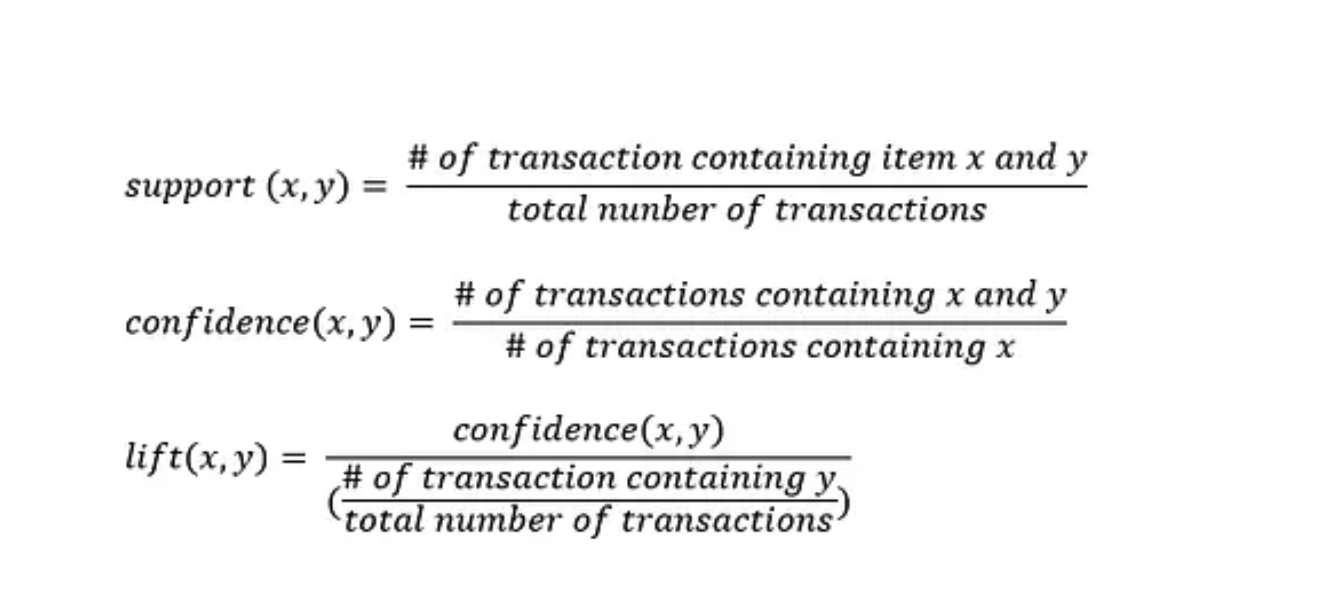

In [1660]:
for user in testsetB.index[28:33]:
    CF_recommender(user)

--------------------
USER: H130414133
completed courses: ['CB22x', 'ER22x']
tier 1: {}
rec step 1: {'PH278x': 0.125}
2.0
6.0
17.0
3.0
rec step 2: {'8.MReV': 0.000855431993156544, '6.00x': 0.0025662959794696323, '6.002x': 0.007271171941830625, '3.091x': 0.0012831479897348161}
--------------------
USER: H130426348
completed courses: ['PH207x', 'PH278x']
tier 1: {}
rec step 1: {'ER22x': 0.014492753623188406}
9.0
14.0
81.0
41.0
rec step 2: {'7.00x': 0.000551166636046298, '2.01x': 0.0008573703227386858, '6.00x': 0.004960499724416682, '14.73x': 0.0025108702308775798}
--------------------
USER: H130433355
completed courses: ['ER22x', 'PH278x']
tier 1: {'CB22x': {'support': 0.004608294930875576, 'confidence': 0.02127659574468085, 'lift': 1.1542553191489362}}
rec: CB22x
rec step 1: {'CB22x': 0.02127659574468085}
10.0
7.0
16.0
19.0
rec step 2: {'7.00x': 0.0007412898443291327, '8.02x': 0.0005189028910303929, '3.091x': 0.0011860637509266123, '14.73x': 0.0014084507042253522}
--------------------
US

In [1635]:
for user in testsetB.index:
    CF_recommender(user)

--------------------
USER: H130000004
completed courses: ['CS50x', 'ER22x']
tier 1: {}
rec step 1: {'PH278x': 0.056074766355140186, 'CB22x': 0.018691588785046728}
rec step 2: {'8.MReV': 0, '6.002x': 0, '2.01x': 0}
--------------------
USER: H130011763
completed courses: ['ER22x', 'PH278x']
tier 1: {'CB22x': {'support': 0.006060606060606061, 'confidence': 0.034482758620689655, 'lift': 1.896551724137931}}
rec: CB22x
rec step 1: {'CB22x': 0.02564102564102564}
rec step 2: {'7.00x': 0, 'PH207x': 0, '6.00x': 0, '14.73x': 0}
--------------------
USER: H130017258
completed courses: ['CS50x', 'ER22x']
tier 1: {}
rec step 1: {}
rec step 2: {'8.02x': 0, '14.73x': 0, 'PH207x': 0, '6.002x': 0, '6.00x': 0}
--------------------
USER: H130020479
completed courses: ['ER22x', 'PH278x']
tier 1: {'CB22x': {'support': 0.012448132780082987, 'confidence': 0.0625, 'lift': 1.3693181818181819}}
rec: CB22x
rec step 1: {'CB22x': 0.05454545454545454, 'PH207x': 0.01818181818181818}
rec step 2: {'8.MReV': 0, 'CS50x'

In [ ]:
# test_user = np.array(test_df.iloc[1, 1:-1]).reshape(1,-1)

In [ ]:
# get_top_n_recommendations(test_user)

In [ ]:
# r = get_top_n_recommendations_v1(test_user)
# r

In [ ]:
# count = 5
# new_dict = {}

# for c in r:
#     if(r[c][1]<=count):
# #     print(r[c][1])
#         new_dict[c]=r[c]

# print(new_dict)

In [ ]:
# course_tally = {}
# count = []

# for course in ptt.columns[:-1]:
#     s = np.nansum(ptt[course])
#     count.append(s)


# print(ptt.columns[:-1])
# print(count)

# scc = np.argsort(count)[::-1]
# print(scc)
# csum = sum(count)
# print(csum)

# for i in range(len(scc)):
#     print(ptt.columns[scc[i]], ": ", count[scc[i]]," -- rank: ", i+1)
    
#     course = ptt.columns[scc[i]]
#     val = count[scc[i]]
#     percentage = val/csum
#     rank = i+1
#     course_tally[course] = tuple([val, rank, percentage])

# print(course_tally)

In [958]:
# DELETE ALL EXCEPT SPECIFIED COLUMNS

# https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
# df_cert = df_cert.loc[:, df_cert.columns.intersection(["course_id", "userid_DI", "certified"])]

In [ ]:
# https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
# df_cert.loc[:, df_cert.columns.intersection(["course_id", "userid_DI", "certified"])]

In [ ]:
# df_cert.index=train_df_o.index

In [ ]:
# ptt = pd.pivot_table(df_cert, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")
# ptt["sum"] = [np.nansum(ptt.loc[row,:].values) for row in ptt.index]

## Create Pivot Table ##

In [ ]:
# # create pivot table
# pt = pd.pivot_table(train_df_o, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")
#                                                              # , "Id"
# pt

In [ ]:
# pt["id"]=pt.index

In [ ]:
# pt.drop_duplicates()

In [ ]:
len(set(pt.id))  # no duplicates in original pt

In [ ]:
# pt[pt.index=="MHxPC130596415"]

In [ ]:
# eliminate duplicate entries
new_user_list = []
for i in range(len(user_ids)):
    if user_ids[i] not in new_user_list:
        new_user_list.append(user_ids[i])

In [ ]:
len(user_ids)

In [ ]:
len(set(user_ids))

In [ ]:
len(new_user_list)

## ATTEMPT AT MORE EFFICIENT RECOMMENDER ##

In [ ]:
# pt_copy2 = pt.loc[new_user_list, :] # remove duplicate entries
# # pt_copy2 = pt_copy2.drop("id", axis=1)
# pt_copy2

In [ ]:
# # Recommend 5 courses from nearest users
# recommended_courses = set()
# count = 0

# # find top n courses
# while (len(recommended_courses)<5 and count<len(new_user_list)):
    
#     # Isolate row in pivot table
#     row = pt_copy2[pt_copy2.index==new_user_list[count]].values[0]
#     row_sum = np.nansum(row)
    
#     # find successfully completed courses
#     if row_sum >= 1:
#         course_idxs = np.where(row == 1.)[0] # isolate first dimension
#         for idx in course_idxs:
#             recommended_courses.add(idx) 
            
#     count += 1

    

#     print(f"Recommended courses: {recommended_courses}, count: {count}")

In [ ]:
# s = []

# for i in range(len(pt_copy2.columns)):
#     s.append(np.nansum(pt_copy2[pt_copy2.columns[i]]))

In [ ]:
s

In [ ]:
[n/sum(s)*100 for n in s]

In [ ]:
# Check among top candidates

In [ ]:
##############################################
#                                            #
#   FIRST VERSION OF A WORKING RECOMMENDER   #
#                                            #
# -sorts based on completed courses, which   #
#    incorporates a kind of rating mecahnism #
#                                            #
##############################################

# recommended_courses = set()
# count = 0

# while (len(recommended_courses)<5 and count<len(new_user_list)):
    
#     # Isolate row in pivot table
#     row = pt[pt.index==new_user_list[count]].values[0]
# #     print(row)
    
#     # find successfully completed courses
#     course_idxs = np.where(row == 1.)[0] # isolate first dimension
# #     print(course_idxs)
    
#     if (len(course_idxs) != 0):
#         for idx in course_idxs:
#             recommended_courses.add(idx) 
            
#     count += 1

    
# print(f"Recommended courses: {recommended_courses}, count: {count}")

In [ ]:
# Attempt to isolate closest users -- 20th percentile

# percentile_20th= int(len(new_user_list)/100 *20)
# percentile_20th

In [ ]:
# pt.iloc[:percentile_20th]

# s = []

# for i in range(len(pt.columns[:-1])):
#     s.append(np.nansum(pt.iloc[:percentile_20th,i].values))

# s
# # print(f"Recommended courses: {recommended_courses}, count: {count}")

In [ ]:
# np.argsort(s)[::-1]

In [ ]:
# accessing data and functions across notebooks: 

# https://stackoverflow.com/questions/49817409/running-a-jupyter-notebook-from-another-notebook
# https://stackoverflow.com/questions/31621414/share-data-between-ipython-notebooks/60863662
# https://stackoverflow.com/questions/19564625/how-can-i-import-from-another-ipython-notebook
# https://stackoverflow.com/questions/54317381/selectively-import-from-another-jupyter-notebook
# https://github.com/jupyterlab/jupyterlab/issues/10873

In [ ]:
# check users
cosine_similarity(test_user, np.array(c.iloc[s[300:500],1:-1]))

In [ ]:
get_cluster(test_user)

In [ ]:
s,c = get_top_n_recommendations(test_user)

In [ ]:
s

In [ ]:
test_user = np.asarray(test_df.iloc[1,:-1]).reshape(1,-1)
test_user

## attempt a test ##

In [ ]:
# cosine_similarity(test_user, [df_t.iloc[0,:-1]])

In [ ]:
# get_cluster(np.asarray(test_df.iloc[1,:-1]).reshape(1,-1))

In [ ]:
# df_t = top_n_nearest_users(test_user)

In [ ]:
# a, b = get_top_n_recommendations(test_user)

In [ ]:
# Check distance of test case to cluster centre:
# https://stackoverflow.com/questions/54240144/distance-between-nodes-and-the-centroid-in-a-kmeans-cluster

In [ ]:
# 1) use k parameter to generate cluster lables
# 2) add cluster labels to dataset

In [ ]:
# df.columns

In [ ]:
# df["course_id"].unique()

## Create a pivot table for test data ##

In [ ]:
# test_data_pt = pd.pivot_table(test_df_o, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")
#                                                              # , "Id"
# test_data_pt

In [ ]:
# Reduce size of dataset by removing all 0 rows (i.e., all rows that do not have a positive ranking)
# test_user_set = []

# for user in test_data_pt.index:
#     row_vals = test_data_pt[test_data_pt.index==user].values[0]
#     if (np.nansum(row_vals)>=1):
#         test_user_set.append(user)
        
# len(test_user_set)

In [ ]:
# test_user_set

In [ ]:
# test_data_pt_2 =test_data_pt[test_data_pt.index.isin(test_user_set)]

In [ ]:
# for user in test_data_pt_2.index:
#     row_vals = test_data_pt_2[test_data_pt_2.index==user].values[0]
#     if (np.nansum(row_vals)>=2):
#         print(user)